# K-Means Clustering With Python

## Introduction

There are many models for clustering out there. In this notebook, I will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the K-means is vastly used for clustering in many data science applications, especially useful if we need to quickly discover insights from unlabeled data.

In [2]:
# Import libraries
import random 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [3]:
# k-Means on a randomly generated dataset
#Lets create our own dataset for this project
# First we need to set up a random seed. Use numpy's random.seed() function, where the seed will be set to 0
np.random.seed(0)

Next we will be making random clusters of points by using the make_blobs class. The make_blobs class can take in many inputs, but we will be using these specific ones.

Input

1.n_samples: The total number of points equally divided among clusters.
   Value will be: 5000
2.centers: The number of centers to generate, or the fixed center locations.
   Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]]
3.cluster_std: The standard deviation of the clusters.
   Value will be: 0.9

Output
1.X: Array of shape [n_samples, n_features]. (Feature Matrix)
   The generated samples.
2.y: Array of shape [n_samples]. (Response Vector)
   The integer labels for cluster membership of each sample.

In [10]:
x,y=make_blobs(n_samples=5000,centers=[[4,4],[-2,-1],[2,-3],[1,1]],cluster_std=0.9)


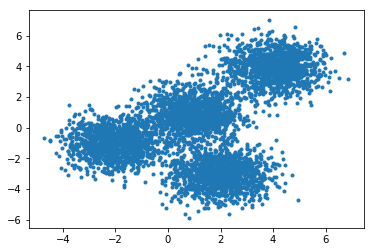

In [13]:
# Displaying the scatter plot of the randomly generated data.
plt.scatter(x[:,0],x[:,1],marker='.')


## Setting up K-Means

Now that we have our random data, let's set up our K-Means Clustering.

The KMeans class has many parameters that can be used, but we will be using these three:

1.init: Initialization method of the centroids.
      Value will be: "k-means++"

2.k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.

3.n_clusters: The number of clusters to form as well as the number of centroids to generate.
            Value will be: 4 (since we have 4 centers)

4.n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init             consecutive runs in terms of inertia.

        Value will be: 12
        
        
        
Initialize KMeans with these parameters, where the output parameter is called k_means.

In [14]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [15]:
# Now let's fit the KMeans model with the feature matrix we created above, x
k_means.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
# Now let's grab the labels for each point in the model using KMeans' .labels_ attribute and save it as k_means_labels
k_means_labels=k_means.labels_
k_means_labes

array([3, 3, 0, ..., 3, 3, 3], dtype=int32)

In [21]:
# We will also get the coordinates of the cluster centers using KMeans.cluster_centers_ and save it as k_means_cluster_centers
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers # the new cluster centers

array([[ 2.00389813, -3.05796248],
       [ 0.99669006,  0.95498843],
       [-2.01562005, -1.0044214 ],
       [ 3.99990623,  3.95599216]])

## Creating the Visual Plot

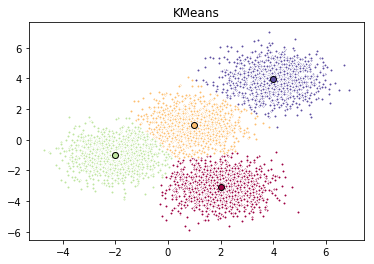

In [24]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(x[my_members, 0], x[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
#ax.set_xticks(())

# Remove y-axis ticks
#ax.set_yticks(())

# Show the plot
plt.show()
